# Limpieza de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
enc = "latin1"
MttoUnidades = pd.read_csv("MttoUnidades.csv",encoding = enc)
DespachoAceite = pd.read_csv("DespachoAceite.csv",encoding = enc)
RegDespacho = pd.read_csv("RegDespacho.csv", encoding = enc)

#MttoUnidades -> 19539
#DespachoAceite -> 975
#RegDespacho -> 15896

In [3]:
#Elimina las filas que contenga todas las columnas vacias
MttoUnidades = MttoUnidades.dropna(axis=0,how="all")
DespachoAceite = DespachoAceite.dropna(axis=0,how="all")
RegDespacho = RegDespacho.dropna(axis=0,how="all")

#MttoUnidades -> 19538
#DespachoAceite -> 975
#RegDespacho -> 15896

### Metodos para la limpieza o llenado 

In [4]:
#Eliminar filas que contenga datos inapropiados en lugar respectivos
def EliminarCampos(df,var,dato):
    df = df.drop(df[var == dato].index)
    return df

In [5]:
#Rellenar valores en las filas que sean NaN 
def RellenarCamposNaN(df,var,cambio):
    df[var] = df[var].fillna(cambio)
    return df

### MttoUnidades

In [6]:
MttoUnidades["unidad"].unique().tolist()

['1031',
 '1061',
 '1033',
 '1009',
 '1060',
 '1062',
 '1081',
 '1018',
 '1048',
 '1045',
 '1087',
 '1017',
 '1084',
 '1073',
 '1088',
 '1044',
 '1034',
 '1025',
 '137',
 '1008',
 '1056',
 '1091',
 '136',
 '1039',
 '1012',
 '1079',
 '1032',
 '1085',
 '1049',
 '1070',
 '1097',
 '1100',
 '1068',
 '1022',
 '1059',
 '141',
 '143',
 '1046',
 '1051',
 '1075',
 '1086',
 '1007',
 '1041',
 '1042',
 '1066',
 '1050',
 '1010',
 '1095',
 '1052',
 '133',
 '1038',
 '1077',
 '1047',
 '1090',
 '1089',
 '131',
 '1074',
 '1072',
 '1065',
 '1080',
 '1053',
 '1096',
 '1030',
 '1064',
 'JMJ0003',
 '1063',
 '1',
 '1023',
 '135',
 '1078',
 'L0009',
 '1069',
 '140',
 '1058',
 '1026',
 '1057',
 '1094',
 '1036',
 '1028',
 nan,
 '1067',
 'JMJ0002',
 '139',
 '142',
 '132',
 '1093',
 '1076',
 'JMJ0008',
 '1037',
 '138',
 '22/05/2017',
 '23/05/2017',
 'JMJ0004',
 '24/05/2017',
 '25/05/2017',
 '1029',
 'JMJ0007',
 '2',
 '130',
 '26/05/2017',
 '1098',
 '1011',
 'L009',
 '29/05/2017',
 '6',
 '5',
 '3',
 '4',
 '1083',
 

In [7]:
#MttoUnidades -> 19507
MttoUnidades = EliminarCampos(MttoUnidades,MttoUnidades.Id,"#¨NOMBRE?")
    
#MttoUnidades -> 19439
MttoUnidades = EliminarCampos(MttoUnidades,MttoUnidades.comentarios,"#¨NOMBRE?")
    
#MttoUnidades -> 19438
MttoUnidades = EliminarCampos(MttoUnidades,MttoUnidades.Id,"- REEMPLAZO DE 4 FOCOS DE PELLISCO")
    
#MttoUnidades -> 19437
MttoUnidades = EliminarCampos(MttoUnidades,MttoUnidades.Id,"-ENGRASADO EN GENERAL .")
    
#MttoUnidades -> 19436
MttoUnidades = EliminarCampos(MttoUnidades,MttoUnidades.Id,"-")
    
#MttoUnidades -> 19435
MttoUnidades = EliminarCampos(MttoUnidades,MttoUnidades.Id,"-RELLENO DE ACEITE (3 LITROS)")
    
#MttoUnidades -> 19351
MttoUnidades = EliminarCampos(MttoUnidades,MttoUnidades.fecha,'ef281d7a-57db-428e-a186-f1c54d48042c')

In [8]:
#En los nan en usermod se le coloca desconocido
RellenarCamposNaN(MttoUnidades,"usermod","Desconocido")

#En los nan en IdModulo le colocamos la siguiente linea
RellenarCamposNaN(MttoUnidades,"IdModulo","00-00:00:00-000")

#En los nan en fechamod le colocamos como valor 00:00.0
RellenarCamposNaN(MttoUnidades,"fechamod","00:00.0")

#en userreg
RellenarCamposNaN(MttoUnidades,"userreg",'00000000-0000-0000-0000-000000000000')

#en fecha
RellenarCamposNaN(MttoUnidades,"fecha",'30/12/9999')

RellenarCamposNaN(MttoUnidades,"unidad",'000')

,Id,unidad,comentarios,fecha,fechareg,userreg,fechamod,usermod,IdModulo
0,1,1031,RELLENO DE ACEITE,05/05/2017,10:02.2,f490eddd-061c-4b64-bfd3-26ef469b9263,23:42.9,f490eddd-061c-4b64-bfd3-26ef469b9263,CA-09:49:14-1031
1,2,1061,CAMBIO DE ACEITE Y FILTROS,05/05/2017,27:33.1,f490eddd-061c-4b64-bfd3-26ef469b9263,23:50.0,f490eddd-061c-4b64-bfd3-26ef469b9263,CA-09:34:03-1061
2,3,1033,SE PUSIERON 2 SOQUETERAS,08/05/2017,02:28.7,ef281d7a-57db-428e-a186-f1c54d48042c,26:20.1,f490eddd-061c-4b64-bfd3-26ef469b9263,00-00:00:00-000
3,4,1009,SE HIZO UNA TA LACHA POSICIàN 7,08/05/2017,12:03.6,ef281d7a-57db-428e-a186-f1c54d48042c,23:58.4,f490eddd-061c-4b64-bfd3-26ef469b9263,00-00:00:00-000
4,5,1060,SE LE CAMBIO UN PLAFON DE STOP,08/05/2017,13:16.5,ef281d7a-57db-428e-a186-f1c54d48042c,24:01.8,f490eddd-061c-4b64-bfd3-26ef469b9263,00-00:00:00-000
...,...,...,...,...,...,...,...,...,...
19534,20461,1010,"REGISTRO DE DESPACHO DIESEL A LA UNIDAD, ACTUA...",16/08/2018,35:58.9,e0a41b9b-ff1a-43de-9f95-497d07165fa6,00:00.0,Desconocido,DU-10:35:58-1010
19535,20462,130,"REGISTRO DE DESPACHO DIESEL A LA UNIDAD, ACTUA...",16/08/2018,28:39.0,e0a41b9b-ff1a-43de-9f95-497d07165fa6,00:00.0,Desconocido,DU-11:28:38-130
19536,20463,135,"REGISTRO DE DESPACHO DIESEL A LA UNIDAD, ACTUA...",16/08/2018,31:52.1,e0a41b9b-ff1a-43de-9f95-497d07165fa6,00:00.0,Desconocido,DU-13:31:52-135
19537,20464,1073,"REGISTRO DE DESPACHO DIESEL A LA UNIDAD, ACTUA...",16/08/2018,32:22.8,e0a41b9b-ff1a-43de-9f95-497d07165fa6,00:00.0,Desconocido,DU-13:32:22-1073


### Despacho Aceite

In [9]:
DespachoAceite.head()

,unidad,linicialaceite,lfinalaceite,comentarios,cantidadlitros,fecha,preciol,Costo,Id
0,1032,2830,2834,CAMBIO DE ACEITE,4,18/02/2017,43.3,173.2,1
1,1078,2834,2858,CAMBIO DE ACEITE,24,18/02/2017,43.3,1039.2,2
2,136,2858,2862,CAMBIO DE ACEITE,4,18/02/2017,43.3,173.2,3
3,138,2862,2866,CAMBIO DE ACEITE,4,20/02/2017,43.3,173.2,4
4,1089,2866,2875,CAMBIO DE ACEITE Y FILTROS,9,20/02/2017,43.3,389.7,7


In [10]:
DespachoAceite["Id"].unique().tolist()

[1,
 2,
 3,
 4,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,

In [11]:
#Despacho Aceite -> 943
DespachoAceite = EliminarCampos(DespachoAceite,DespachoAceite.comentarios,'#¨NOMBRE?')
len(DespachoAceite)

943

In [12]:
#Rellenar unidad  que estan NAN
RellenarCamposNaN(DespachoAceite,"unidad","000")
RellenarCamposNaN(DespachoAceite,"comentarios","Desconocido")

,unidad,linicialaceite,lfinalaceite,comentarios,cantidadlitros,fecha,preciol,Costo,Id
0,1032,2830,2834,CAMBIO DE ACEITE,4,18/02/2017,43.3,173.2,1
1,1078,2834,2858,CAMBIO DE ACEITE,24,18/02/2017,43.3,1039.2,2
2,136,2858,2862,CAMBIO DE ACEITE,4,18/02/2017,43.3,173.2,3
3,138,2862,2866,CAMBIO DE ACEITE,4,20/02/2017,43.3,173.2,4
4,1089,2866,2875,CAMBIO DE ACEITE Y FILTROS,9,20/02/2017,43.3,389.7,7
...,...,...,...,...,...,...,...,...,...
970,5,17634,17636,RELLENO,2,14/08/2018,43.3,86.6,978
971,10,17636,17640,RELLENO,4,14/08/2018,43.3,173.2,979
972,143,17640,17644,CAMBIO DE ACEITE Y FILTROS,4,16/08/2018,43.3,173.2,980
973,1056,17644,17648,RELLENO,4,16/08/2018,43.3,173.2,981


In [13]:
len(DespachoAceite)

943

## RegDespacho

In [14]:
RegDespacho.head()

,id,noeconomico,KMActual,DespachoLitros,FechaDespacho,fechareg,userreg,fechamod,usermod,KMAnterior,Operador,Rendimiento,Precio
0,1,1007,674258,300.0,12/04/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,661020,NaN,0.0,NaN
1,2,1008,1380120,300.0,16/03/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,1379910,NaN,0.0,NaN
2,3,1009,460325,159.0,24/03/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,456858,NaN,0.0,NaN
3,4,1010,920375,236.0,10/04/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,920328,NaN,0.0,NaN
4,5,1011,218724,215.0,05/04/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,215419,NaN,0.0,NaN


In [15]:
#RegDespacho["Precio"].unique().tolist()

In [16]:
RellenarCamposNaN(RegDespacho,"fechamod","00:00.0")

RellenarCamposNaN(RegDespacho,"usermod","Desconocido")

RellenarCamposNaN(RegDespacho,"Operador","Desconocido")

RellenarCamposNaN(RegDespacho,"Precio",0.0)

,id,noeconomico,KMActual,DespachoLitros,FechaDespacho,fechareg,userreg,fechamod,usermod,KMAnterior,Operador,Rendimiento,Precio
0,1,1007,674258,300.000,12/04/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,661020,Desconocido,0.00,0.00
1,2,1008,1380120,300.000,16/03/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,1379910,Desconocido,0.00,0.00
2,3,1009,460325,159.000,24/03/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,456858,Desconocido,0.00,0.00
3,4,1010,920375,236.000,10/04/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,920328,Desconocido,0.00,0.00
4,5,1011,218724,215.000,05/04/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,215419,Desconocido,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15891,16919,1010,961708,147.782,16/08/2018,35:58.9,e0a41b9b-ff1a-43de-9f95-497d07165fa6,00:00.0,Desconocido,961532,VALDEMAR REBOLLAR MIRELES,1.19,16.14
15892,16920,130,216793,27.903,16/08/2018,28:39.0,e0a41b9b-ff1a-43de-9f95-497d07165fa6,00:00.0,Desconocido,216655,PEDRO HERNANDEZ MENDOZA,4.95,15.18
15893,16921,135,156111,24.071,16/08/2018,31:52.1,e0a41b9b-ff1a-43de-9f95-497d07165fa6,00:00.0,Desconocido,155984,JUAN DIEGO MARTINEZ CASTRO,5.28,15.18
15894,16922,1073,291867,50.379,16/08/2018,32:22.8,e0a41b9b-ff1a-43de-9f95-497d07165fa6,00:00.0,Desconocido,291442,OSCAR GOMEZ FONCECA,8.44,15.18


## Data Grinding 

In [17]:
MttoUnidades.head()

,Id,unidad,comentarios,fecha,fechareg,userreg,fechamod,usermod,IdModulo
0,1,1031,RELLENO DE ACEITE,05/05/2017,10:02.2,f490eddd-061c-4b64-bfd3-26ef469b9263,23:42.9,f490eddd-061c-4b64-bfd3-26ef469b9263,CA-09:49:14-1031
1,2,1061,CAMBIO DE ACEITE Y FILTROS,05/05/2017,27:33.1,f490eddd-061c-4b64-bfd3-26ef469b9263,23:50.0,f490eddd-061c-4b64-bfd3-26ef469b9263,CA-09:34:03-1061
2,3,1033,SE PUSIERON 2 SOQUETERAS,08/05/2017,02:28.7,ef281d7a-57db-428e-a186-f1c54d48042c,26:20.1,f490eddd-061c-4b64-bfd3-26ef469b9263,00-00:00:00-000
3,4,1009,SE HIZO UNA TA LACHA POSICIàN 7,08/05/2017,12:03.6,ef281d7a-57db-428e-a186-f1c54d48042c,23:58.4,f490eddd-061c-4b64-bfd3-26ef469b9263,00-00:00:00-000
4,5,1060,SE LE CAMBIO UN PLAFON DE STOP,08/05/2017,13:16.5,ef281d7a-57db-428e-a186-f1c54d48042c,24:01.8,f490eddd-061c-4b64-bfd3-26ef469b9263,00-00:00:00-000


### Conocer la cantidad de mantenimientos que hubieron

In [19]:
Check = MttoUnidades["comentarios"].value_counts()
Check = Check.head(3)
Check

REGISTRO DE DESPACHO DIESEL A LA UNIDAD, ACTUALIZO KM/MI      15876
REGISTRO DE CAMBIO DE ACEITE DE LA UNIDAD, ACTUALIZO KM/MI      666
CAMBIO DE ACEITE Y FILTROS                                      538
Name: comentarios, dtype: int64

In [106]:
def  ImprimirPastel1():
    Check.plot(kind="pie",autopct = "%1.1f%%", fontsize = 12)
    #plt.ylabel(" ")
    plt.title("Grafica de los mantenimientos mas frecuentes",fontsize=16)
    return

In [107]:
def ListaUnit():
    CantidadUnidades = MttoUnidades["comentarios"].value_counts()
    CantidadUnidades = CantidadUnidades.to_frame().reset_index()
    #Cambiar nombre de las columnas
    CantidadUnidades.columns = ["Comentarios","Cantidad"]
    #Cambiar nombre de nuestro indice
    CantidadUnidades.index.names =  ["Id"]
    return CantidadUnidades

In [108]:
print("Cantidad de comentarios en total: " + str(len(ListaUnit())))

Cantidad de comentarios en total: 1609


,Comentarios,Cantidad
Id,,
0,"REGISTRO DE DESPACHO DIESEL A LA UNIDAD, ACTUA...",15876
1,"REGISTRO DE CAMBIO DE ACEITE DE LA UNIDAD, ACT...",666
2,CAMBIO DE ACEITE Y FILTROS,538
3,RELLENO,277
4,MANTENIMIENTO GENERAL.,54
5,MANTENIMIENTO.,41
6,RELLENO DE ACEITE,25
7,RELLENO DE ACEITE.,24
8,REVICION DE NIVELES.,14


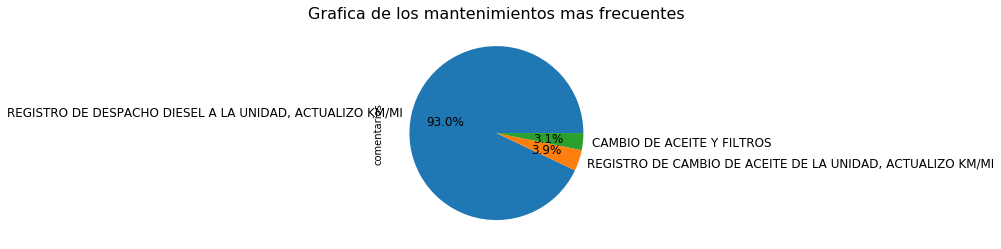

In [109]:
ImprimirPastel1()
LU = ListaUnit()
LU.head(10)

### Conocer la cantidad de mantenimientos que se le hicieron a las unidades

In [110]:
CU = MttoUnidades["unidad"].value_counts()
CU = CU.head(5)
type(CU)

pandas.core.series.Series

In [111]:
def ImprimirPastel2():
    CU.plot(kind="pie",autopct = "%1.1f%%",fontsize=12)
    #plt.ylabel("")
    plt.xlabel("Unidades")
    plt.title("Las 5 unidades con mas numero de mantenimiento", fontsize=16)
    return


In [112]:
def  CountUnityL():
    CountUnity = MttoUnidades["unidad"].value_counts()
    CountUnity = CountUnity.to_frame().reset_index()
    
    CountUnity.columns = ["Unidad","Cantidad de Mantenimiento"]
    CountUnity.index.names = ["Id"]
    return CountUnity.head(5)

,Unidad,Cantidad de Mantenimiento
Id,,
0,1060,269
1,1074,265
2,1072,257
3,1088,254
4,1066,254


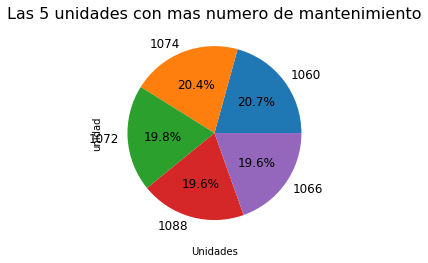

In [113]:
ImprimirPastel2()
CountUnityL()

## DespachoAceite

In [114]:
DespachoAceite.head()

,unidad,linicialaceite,lfinalaceite,comentarios,cantidadlitros,fecha,preciol,Costo,Id
0,1032,2830,2834,CAMBIO DE ACEITE,4,18/02/2017,43.3,173.2,1
1,1078,2834,2858,CAMBIO DE ACEITE,24,18/02/2017,43.3,1039.2,2
2,136,2858,2862,CAMBIO DE ACEITE,4,18/02/2017,43.3,173.2,3
3,138,2862,2866,CAMBIO DE ACEITE,4,20/02/2017,43.3,173.2,4
4,1089,2866,2875,CAMBIO DE ACEITE Y FILTROS,9,20/02/2017,43.3,389.7,7


### Cuales fueron los mayores cambios que tuvieron las unidades

In [115]:
def Lista():
    DA = DespachoAceite["comentarios"].value_counts()
    DA = DA.head(4)
    DA.columns = ["Cambios","Cantidad"]
    DA = DA.to_frame().reset_index()
    DA.index.names = ["Id"]
    return DA

def CambiarColumnas():
    DA = Lista()
    DA.columns = ["Cambios","Cantidad"]
    return DA

In [116]:
def ImprimirPastel3():
    DA = DespachoAceite["comentarios"].value_counts()
    DA = DA.to_frame()
    DA = DA.head(4)
    DA["comentarios"].plot(kind="pie", autopct = "%1.1f%%",fontsize=12)
    #plt.ylabel("")
    plt.xlabel("")
    plt.title("Cuales fueron los mayores cambio que tuvieron las unidades",fontsize= 16)

,Cambios,Cantidad
Id,,
0,CAMBIO DE ACEITE Y FILTROS,612
1,RELLENO,212
2,RELLENO DE ACEITE,70
3,CAMBIO DE ACEITE Y FILTRO,14


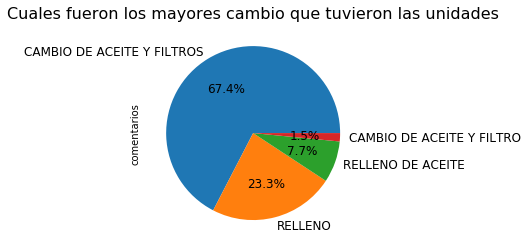

In [117]:
ImprimirPastel3()
CambiarColumnas()

### Cuales fueron las unidades que mas se gasto en compra de aceite

In [118]:
def AgruparYSumar():
    #Agrupar lo datos por la unidades y sumar sus costos 
    datagroup = DespachoAceite.groupby("unidad").agg({"Costo":"sum"}).reset_index()
    #Acomodarlos de forma descendentes
    datagroup = datagroup.sort_values(by="Costo",ascending=False)
    topdatag = datagroup.head(10)
    
    topdatag.index.names = ["Id"]
    return topdatag
    


In [119]:
def AgrupationWithoutIndex():
    datagroup = DespachoAceite.groupby("unidad").agg({"Costo":"sum"})
    datagroup = datagroup.sort_values(by="Costo",ascending=False)
    datagroup = datagroup.head(10)
    return datagroup

def ImprimirPastel4():
    aux = AgrupationWithoutIndex()
    aux = aux["Costo"]
    aux.plot(kind="pie",autopct = "%1.1f%%",fontsize=12)
    plt.xlabel("")
    plt.title("Las 10 unidades que mas se ha gastado dinero en aceite",fontsize=16)
    return

,unidad,Costo
Id,,
18,1031,23901.6
114,L008,10868.3
67,1085,9352.8
117,L011,9309.5
68,1086,8400.2
19,1032,7967.2
113,L0009,7837.3
33,1049,7620.8
17,1030,7447.6


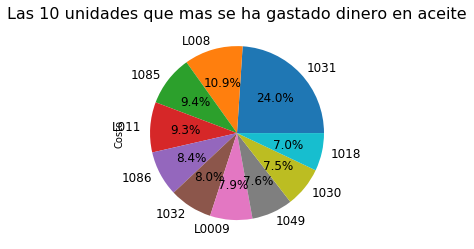

In [120]:
ImprimirPastel4()
AgruparYSumar()

### Unidad que consumio mas litros de aceite

In [121]:
#DespachoAceite[DespachoAceite["unidad"] == "1031"]

In [122]:
def AgregarSumar():
    datagroup = DespachoAceite.groupby("unidad").agg({"cantidadlitros":"sum"}).reset_index()
    datagroup = datagroup.sort_values(by="cantidadlitros",ascending=False)
    datagroup = datagroup.head(10)
    datagroup.index.names = ["Id"]
    return datagroup

def CambiarColumnas2():
    datagroup = AgregarSumar()
    datagroup.columns = ["Unidad","Litros Totales"]
    return datagroup

In [123]:
def AWI2():
    datagroup = DespachoAceite.groupby("unidad").agg({"cantidadlitros":"sum"})
    datagroup = datagroup.sort_values(by="cantidadlitros",ascending=False)
    datagroup = datagroup.head(10)
    return datagroup
    
def ImprimirPastel5():
    lista = AWI2()
    lista = lista["cantidadlitros"]
    lista.plot(kind="pie",autopct ="%1.1f%%",fontsize=12)
    plt.title("Unidad que consumieron mas cambios de aceite",fontsize=16)
    return
    

,Unidad,Litros Totales
Id,,
18,1031,552
114,L008,251
67,1085,216
117,L011,215
68,1086,194
19,1032,184
113,L0009,181
33,1049,176
17,1030,172


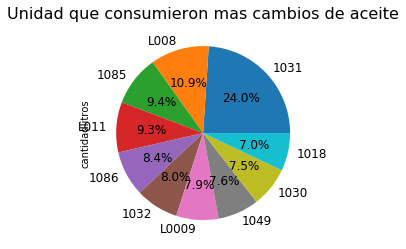

In [124]:
ImprimirPastel5()
CambiarColumnas2()

# Estadisticas de los dataframe

## Mantenimiento de Unidades 

In [125]:
MttoUnidades.head()

,Id,unidad,comentarios,fecha,fechareg,userreg,fechamod,usermod,IdModulo
0,1,1031,RELLENO DE ACEITE,05/05/2017,10:02.2,f490eddd-061c-4b64-bfd3-26ef469b9263,23:42.9,f490eddd-061c-4b64-bfd3-26ef469b9263,CA-09:49:14-1031
1,2,1061,CAMBIO DE ACEITE Y FILTROS,05/05/2017,27:33.1,f490eddd-061c-4b64-bfd3-26ef469b9263,23:50.0,f490eddd-061c-4b64-bfd3-26ef469b9263,CA-09:34:03-1061
2,3,1033,SE PUSIERON 2 SOQUETERAS,08/05/2017,02:28.7,ef281d7a-57db-428e-a186-f1c54d48042c,26:20.1,f490eddd-061c-4b64-bfd3-26ef469b9263,00-00:00:00-000
3,4,1009,SE HIZO UNA TA LACHA POSICIàN 7,08/05/2017,12:03.6,ef281d7a-57db-428e-a186-f1c54d48042c,23:58.4,f490eddd-061c-4b64-bfd3-26ef469b9263,00-00:00:00-000
4,5,1060,SE LE CAMBIO UN PLAFON DE STOP,08/05/2017,13:16.5,ef281d7a-57db-428e-a186-f1c54d48042c,24:01.8,f490eddd-061c-4b64-bfd3-26ef469b9263,00-00:00:00-000


In [126]:
MttoUnidades["unidad"].describe()

count     19351
unique      148
top        1060
freq        269
Name: unidad, dtype: object

## DespachoAceite

In [127]:
DespachoAceite.head()

,unidad,linicialaceite,lfinalaceite,comentarios,cantidadlitros,fecha,preciol,Costo,Id
0,1032,2830,2834,CAMBIO DE ACEITE,4,18/02/2017,43.3,173.2,1
1,1078,2834,2858,CAMBIO DE ACEITE,24,18/02/2017,43.3,1039.2,2
2,136,2858,2862,CAMBIO DE ACEITE,4,18/02/2017,43.3,173.2,3
3,138,2862,2866,CAMBIO DE ACEITE,4,20/02/2017,43.3,173.2,4
4,1089,2866,2875,CAMBIO DE ACEITE Y FILTROS,9,20/02/2017,43.3,389.7,7


In [20]:
DespachoAceite.describe()

,linicialaceite,lfinalaceite,cantidadlitros,preciol,Costo,Id
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,9098.009544,9089.847296,10.044539,43.253446,434.449629,503.430541
std,4797.872515,4815.513522,9.264922,1.410089,401.374160,282.511066
min,2830.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5575.500000,5568.500000,5.000000,43.300000,216.500000,273.500000
50%,7550.000000,7550.000000,7.000000,43.300000,303.100000,509.000000
75%,15093.500000,15093.500000,10.000000,43.300000,433.000000,746.500000
max,17648.000000,17691.000000,43.000000,43.300000,1861.900000,982.000000


## Registro de Despachos 

In [21]:
RegDespacho.head()

,id,noeconomico,KMActual,DespachoLitros,FechaDespacho,fechareg,userreg,fechamod,usermod,KMAnterior,Operador,Rendimiento,Precio
0,1,1007,674258,300.0,12/04/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,661020,Desconocido,0.0,0.0
1,2,1008,1380120,300.0,16/03/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,1379910,Desconocido,0.0,0.0
2,3,1009,460325,159.0,24/03/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,456858,Desconocido,0.0,0.0
3,4,1010,920375,236.0,10/04/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,920328,Desconocido,0.0,0.0
4,5,1011,218724,215.0,05/04/2017,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,00:00.0,f490eddd-061c-4b64-bfd3-26ef469b9263,215419,Desconocido,0.0,0.0


In [22]:
RegDespacho.describe()

,id,KMActual,DespachoLitros,KMAnterior,Rendimiento,Precio
count,15896.000000,1.589600e+04,15896.000000,1.589600e+04,15896.000000,15896.000000
mean,8714.841092,2.400681e+05,210.861765,2.386799e+05,21.156500,9.228315
std,4929.740810,2.384656e+05,2987.067636,2.384937e+05,806.472248,7.026694
min,1.000000,2.930000e+02,3.854000,0.000000e+00,-11759.810000,0.000000
25%,4974.750000,1.012840e+05,70.507000,1.001628e+05,1.180000,0.000000
50%,8966.500000,1.660470e+05,100.000000,1.652820e+05,2.950000,13.850000
75%,12946.250000,2.848858e+05,248.669000,2.834090e+05,7.210000,14.860000
max,16923.000000,3.985590e+06,259844.000000,3.978750e+06,92645.590000,18.900000
